In [ ]:
# Install dependencies
!pip install numpy tqdm matplotlib
!pip install import_ipynb

In [ ]:
# %matplotlib widget
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import import_ipynb
import aux_functions as auxf

importing Jupyter notebook from aux_functions.ipynb


In [ ]:
_, unwrapped_phase_mat, coherence_mat, amplitude_mat, _, wavelength = auxf.read_nc("S1-GUNW-D-R-007-tops-20220602_20220521-043224-00021E_00036N-PP-6cd4-v2_0_5.nc")
wrapped_phase_mat = np.fmod(unwrapped_phase_mat, np.pi)
# print(np.max(wrapped_phase_mat), np.min(wrapped_phase_mat))

In [ ]:
CMAP = "magma"

# 

/tmp/ipykernel_292350/913507105.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_292350/913507105.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


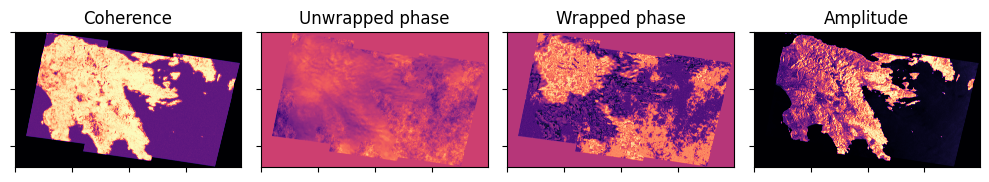

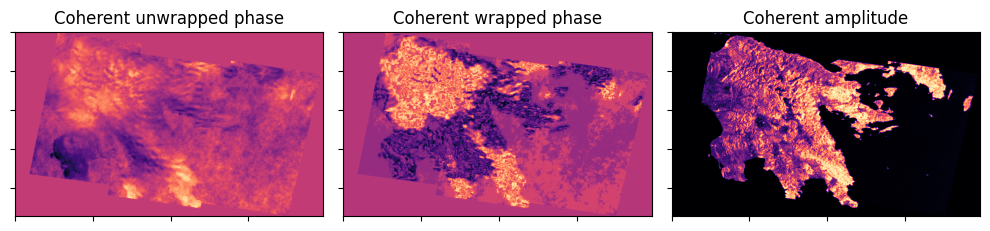

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(10,10))

axs[0].imshow(coherence_mat, cmap=CMAP)
axs[0].set_title("Coherence")
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
 
axs[1].imshow(unwrapped_phase_mat, cmap=CMAP)
axs[1].set_title("Unwrapped phase")
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
 
axs[2].imshow(wrapped_phase_mat, cmap=CMAP)
axs[2].set_title("Wrapped phase")
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])
 
amplitude_mat = np.clip(amplitude_mat, 0, np.percentile(amplitude_mat, 90))
axs[3].imshow(amplitude_mat, cmap=CMAP)
axs[3].set_title("Amplitude")
axs[3].set_xticklabels([])
axs[3].set_yticklabels([])

fig.tight_layout()
fig.show()

fig, axs = plt.subplots(1, 3, figsize=(10,10))

coherent_uwphase = auxf.coherentise(unwrapped_phase_mat, coherence_mat, b=0.9)
axs[0].imshow(coherent_uwphase, cmap=CMAP)
axs[0].set_title("Coherent unwrapped phase")
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
 
coherent_wphase = auxf.coherentise(wrapped_phase_mat, coherence_mat, b=0.9)
axs[1].imshow(coherent_wphase, cmap=CMAP)
axs[1].set_title("Coherent wrapped phase")
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

coherent_amplitude = auxf.coherentise(amplitude_mat, coherence_mat, b=0.9)
axs[2].imshow(coherent_amplitude, cmap=CMAP)
axs[2].set_title("Coherent amplitude")
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])

fig.tight_layout()
fig.show()

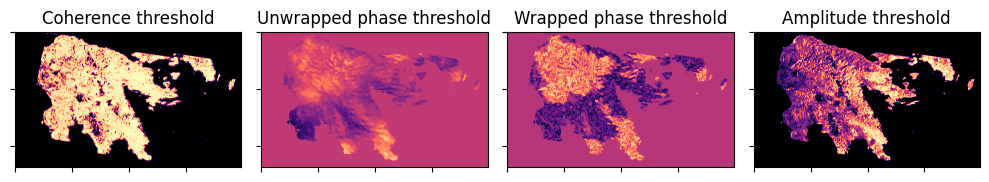

In [ ]:
COHERENCE_THRESHOLD = 0.75
t_uwphase_mat = unwrapped_phase_mat * (coherence_mat > COHERENCE_THRESHOLD)
t_wphase_mat = wrapped_phase_mat * (coherence_mat > COHERENCE_THRESHOLD)
t_coherence_mat = coherence_mat * (coherence_mat > COHERENCE_THRESHOLD)
t_amplitude_mat = amplitude_mat * (coherence_mat > COHERENCE_THRESHOLD)

m_uwphase_mat = unwrapped_phase_mat * coherence_mat
m_wphase_mat = wrapped_phase_mat * coherence_mat
m_coherence_mat = coherence_mat * coherence_mat

fig, axs = plt.subplots(1, 4, figsize=(10,10))
axs[0].imshow(t_coherence_mat, cmap=CMAP)
axs[0].set_title("Coherence threshold")
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1].imshow(t_uwphase_mat, cmap=CMAP)
axs[1].set_title("Unwrapped phase threshold")
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2].imshow(t_wphase_mat, cmap=CMAP)
axs[2].set_title("Wrapped phase threshold")
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])

axs[3].imshow(t_amplitude_mat, cmap=CMAP)
axs[3].set_title("Amplitude threshold")
axs[3].set_xticklabels([])
axs[3].set_yticklabels([])

fig.tight_layout()

-3.0101995
3.0169218


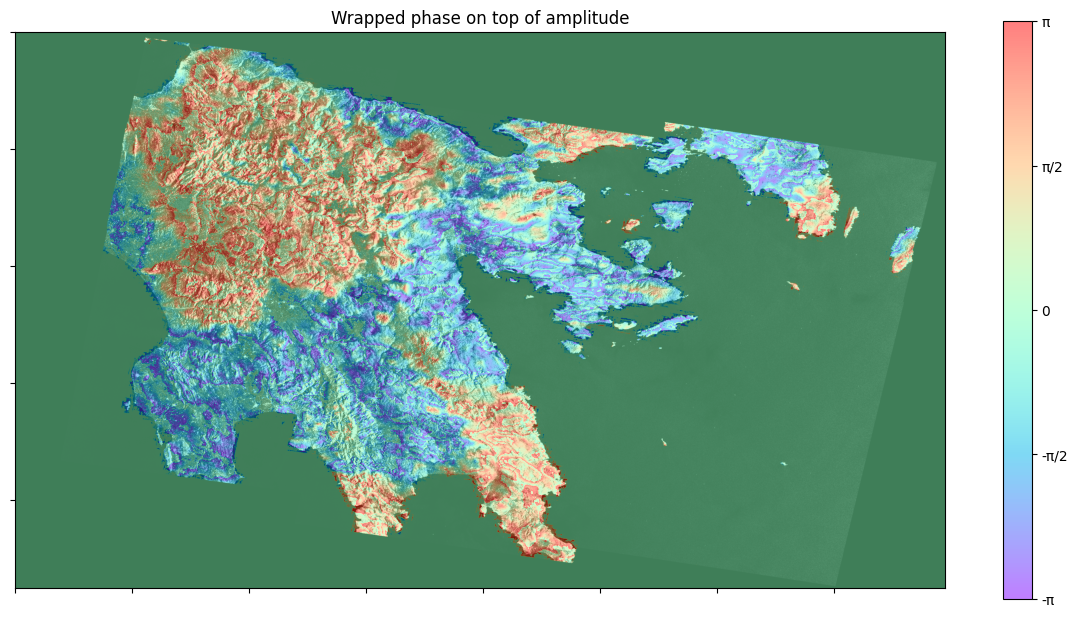

In [ ]:
auxf.draw_phase_amplitude(t_wphase_mat, amplitude_mat)
w2_phase = np.fmod(coherent_wphase, np.pi)
print(np.min(w2_phase))
print(np.max(w2_phase))

plt.show()

As expect, the image has some noise (look at the water).
We can do better than that. Let's try to soften the noise in it.

We'll use a few algorithms:
 - Averaging through convolution (with different resolutions).
 - Averaging multiple images taken from the same position.
 - Averating multiple images taken from different position.

Simple convolution:   0%|          | 0/2228 [00:00<?, ?it/s]

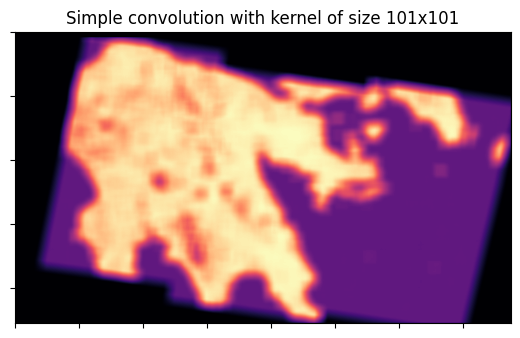

In [ ]:
CONV_RESOLUTION = 50
conv_coherence_mat = auxf.simple_convolution(coherence_mat, CONV_RESOLUTION)
fig, ax = plt.subplots()

ax.imshow(conv_coherence_mat, cmap="magma")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f"Simple convolution with kernel of size {CONV_RESOLUTION*2+1}x{CONV_RESOLUTION*2+1}");

As you can see, we have a reduction of noise, however, the image resolution is lost in the process, meaning we have a loss of data. And this is the prolem od the averageing algorithm.
Let's try something else, an algorithm that also uses the averaging system, but with other images, so that we make a temporal average and don't lose data at the image.

In [ ]:
CONV_RESOLUTION = 101
B = 1
conv_coherence_mat = auxf.convolution_with_exp(t_uwphase_mat, CONV_RESOLUTION, B)
fig, ax = plt.subplots()

ax.imshow(conv_coherence_mat, cmap="magma")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f"Convolution with exp, kernel of size {CONV_RESOLUTION}x{CONV_RESOLUTION}, B={B}");

Sadly, convoluting every pixel with a large kernel size is *really* slow to compute in the cpu. Luckily for us, the gpu is really fast at working with large pieces of data, like images! So we implemented the algorithm as a cuda kernel that runs in our nvidia's gpu. 

In [ ]:
KERNEL_SIZE = 101
B = 1
conv_coherence_mat = auxf.convolution_in_exp_steroids(t_uwphase_mat, KERNEL_SIZE, B)
fig, ax = plt.subplots()

ax.imshow(conv_coherence_mat, cmap="magma")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f"Convolution in the gpu, kernel of size {KERNEL_SIZE}x{KERNEL_SIZE}, B={B}");